## Global Precipitation Climatology Project (GPCP)

In [1]:
import xarray as xr
import numpy as np
from os.path import expanduser
home = expanduser("~")
import skimage.measure as skm
import matplotlib.pyplot as plt

In [2]:
folder = home + '/Documents/data/obs/GPCP'
fileName = 'GPCP_precip_2005_2017'
path = folder + '/' + fileName
ds = xr.open_dataset(path)
ds

<xarray.Dataset>
Dimensions:      (latitude: 180, longitude: 360, time: 9374, nv: 2)
Coordinates:
  * latitude     (latitude) float32 -90.0 -89.0 -88.0 -87.0 ... 87.0 88.0 89.0
  * longitude    (longitude) float32 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * time         (time) datetime64[ns] 2005-06-08 2005-12-27 ... 2017-11-26
Dimensions without coordinates: nv
Data variables:
    lat_bounds   (time, latitude, nv) float32 ...
    lon_bounds   (time, longitude, nv) float32 ...
    time_bounds  (time, nv) datetime64[ns] ...
    precip       (time, latitude, longitude) float32 ...
Attributes: (12/45)
    Conventions:                CF-1.6, ACDD 1.3
    title:                      Global Precipitation Climatatology Project (G...
    source:                     /data1/GPCP_CDR/GPCP_Output/1DD//bin/200506/s...
    references:                 Huffman et al. 1997, http://dx.doi.org/10.117...
    history:                    1) 2017-05-30T17:02:55Z, Dr. Jian-Jian Wang, ...
    Metadata_Conventions:       CF-1.6, Unidata Dataset Discovery v1.0, NOAA ...
    ...                         ...
    metadata_link:              gov.noaa.ncdc:XXXXX
    product_version:            v01r03
    platform:                   GOES (Geostationary Operational Environmental...
    sensor:                     Imager, AIRS > Atmospheric Infrared Sounder, ...
    spatial_resolution:         1 degree
    comment:                    Processing computer: eagle2.umd.edu

In [3]:
precip = ds.precip
precip

<xarray.DataArray 'precip' (time: 9374, latitude: 180, longitude: 360)>
[607435200 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float32 -90.0 -89.0 -88.0 -87.0 ... 87.0 88.0 89.0
  * longitude  (longitude) float32 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * time       (time) datetime64[ns] 2005-06-08 2005-12-27 ... 2017-11-26
Attributes:
    long_name:      NOAA Climate Data Record (CDR) of Daily GPCP Satellite-Ga...
    standard_name:  lwe_precipitation_rate
    units:          mm/day
    valid_range:    [  0. 100.]
    cell_methods:   area: mean time: mean

In [4]:
precip = precip.rename({'latitude': 'lat', 'longitude': 'lon'})

In [5]:
precip

<xarray.DataArray 'precip' (time: 9374, lat: 180, lon: 360)>
[607435200 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 86.0 87.0 88.0 89.0
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) datetime64[ns] 2005-06-08 2005-12-27 ... 2017-11-26
Attributes:
    long_name:      NOAA Climate Data Record (CDR) of Daily GPCP Satellite-Ga...
    standard_name:  lwe_precipitation_rate
    units:          mm/day
    valid_range:    [  0. 100.]
    cell_methods:   area: mean time: mean

In [6]:
precip = precip.sel(lat = slice(-30, 30))
precip

<xarray.DataArray 'precip' (time: 9374, lat: 61, lon: 360)>
[205853040 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -30.0 -29.0 -28.0 -27.0 -26.0 ... 27.0 28.0 29.0 30.0
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) datetime64[ns] 2005-06-08 2005-12-27 ... 2017-11-26
Attributes:
    long_name:      NOAA Climate Data Record (CDR) of Daily GPCP Satellite-Ga...
    standard_name:  lwe_precipitation_rate
    units:          mm/day
    valid_range:    [  0. 100.]
    cell_methods:   area: mean time: mean

In [7]:
from metrics.funcs.aggFuncs import *
from metrics.funcs.prFuncs import *
from metrics.funcs.vars.myFuncs import *

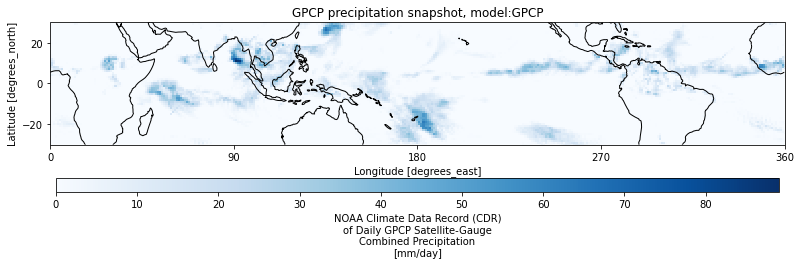

In [8]:
plot_snapshot(precip.isel(time=0), 'Blues', 'GPCP precipitation', 'GPCP')

In [9]:
precip.encoding

{'zlib': False,
 'shuffle': False,
 'complevel': 0,
 'fletcher32': False,
 'contiguous': True,
 'chunksizes': None,
 'source': '/Users/cbla0002/Documents/data/obs/GPCP/GPCP_precip_2005_2017',
 'original_shape': (9374, 180, 360),
 'dtype': dtype('float32'),
 'missing_value': -9999.0,
 '_FillValue': nan,
 'coordinates': 'time latitude longitude'}

In [10]:
valid_range = [0, 100]
precip = precip.where((precip >= valid_range[0]) & (precip <= valid_range[1]), np.nan)

Text(0.5, 0, 'days')

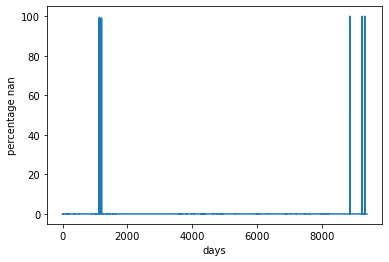

In [11]:
gridboxes_NB = np.shape(precip.isel(time=0))[0] * np.shape(precip.isel(time=0))[1]
nan_count_time = precip.isnull().sum(dim=('lat', 'lon'))
percentage_nan = (nan_count_time/gridboxes_NB)*100
plt.plot(percentage_nan)
plt.ylabel('percentage nan')
plt.xlabel('days')

In [12]:
print('total number of days:',len(precip.time.data))
print('number of gridboxes:', gridboxes_NB)
print('how many gridboxes a certain fraciton of nan is:', gridboxes_NB *0.5 *0.01)

total number of days: 9374
number of gridboxes: 21960
how many gridboxes a certain fraciton of nan is: 109.8


In [13]:
np.sum((percentage_nan>0.5)*1)

<xarray.DataArray 'precip' ()>
array(8)

In [14]:
def calc_pr_percentiles(precip):

    pr95 = precip.quantile(0.95,dim=('lat','lon'),keep_attrs=True, skipna=True)
    pr95 = xr.DataArray(
        data = pr95.data,
        dims = ['time'],
        coords = {'time': precip.time.data}, 
        attrs = {'units':'mm/day'}
        )

    pr97 = precip.quantile(0.97,dim=('lat','lon'),keep_attrs=True, skipna=True)
    pr97 = xr.DataArray(
        data = pr97.data,
        dims = ['time'],
        coords = {'time': precip.time.data},
        attrs = {'units':'mm/day'}
        )

    pr99 = precip.quantile(0.99,dim=('lat','lon'),keep_attrs=True, skipna=True)
    pr99 = xr.DataArray(
        data = pr99.data,
        dims = ['time'],
        coords = {'time': precip.time.data},
        attrs = {'units':'mm/day'}
        )

    pr999 = precip.quantile(0.999,dim=('lat','lon'),keep_attrs=True, skipna=True)
    pr999 = xr.DataArray(
        data = pr999.data,
        dims = ['time'],
        coords = {'time': precip.time.data},
        attrs = {'units':'mm/day'}
        )
        

    pr_percentiles = xr.Dataset(
        data_vars = {'pr95': pr95, 
                     'pr97': pr97, 
                     'pr99': pr99, 
                     'pr999': pr999}
        ) 

    return pr_percentiles

In [15]:
pr_percentiles = calc_pr_percentiles(precip)
pr_percentiles

/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


<xarray.Dataset>
Dimensions:  (time: 9374)
Coordinates:
  * time     (time) datetime64[ns] 2005-06-08 2005-12-27 ... 2017-11-26
Data variables:
    pr95     (time) float64 20.79 17.1 19.44 20.81 ... 15.69 17.69 19.1 18.19
    pr97     (time) float64 26.28 22.26 25.41 28.2 ... 20.01 22.26 24.74 22.18
    pr99     (time) float64 37.09 32.71 38.15 43.59 ... 28.71 30.4 35.14 28.68
    pr999    (time) float64 58.18 51.8 72.41 82.69 ... 45.91 49.24 48.91 42.01

In [16]:
conv_threshold = pr_percentiles.pr97.mean(dim='time')
conv_threshold

<xarray.DataArray 'pr97' ()>
array(22.67268691)

In [17]:
lat = precip.lat.data
lon = precip.lon.data
lonm,latm = np.meshgrid(lon,lat)
dlat = (lat[1]-lat[0])
dlon = (lon[1]-lon[0])
R = 6371
aream = np.cos(np.deg2rad(latm))*np.float64(dlon*dlat*R**2*(np.pi/180)**2)
latm3d = np.expand_dims(latm,axis=2) # used for broadcasting
lonm3d = np.expand_dims(lonm,axis=2)
day = 0

In [18]:
pr_day = precip.isel(time=day)
L = skm.label(pr_day.where(pr_day>=conv_threshold,0)>0, background=0,connectivity=2)

connect_boundary(L)
labels = np.unique(L)[1:]

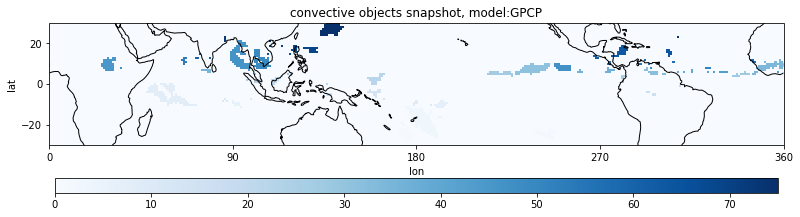

In [19]:
L_xr = xr.DataArray(
    data=L,
    dims=['lat', 'lon'],
    coords={'lat': pr_day.lat.data, 'lon': pr_day.lon.data}
    )
plot_snapshot(L_xr, 'Blues', 'convective objects', 'GPCP')

In [20]:
rome_scene(L, labels, lat, lon, aream, latm3d, lonm3d)

256306.74542843457

In [26]:
# aWeights = np.cos(np.deg2rad(precip.lat))
# precip_sMean= precip.weighted(aWeights).mean(dim=('lat','lon'))
# precip_sMean.plot(figsize=(20,10))

In [22]:
# rome = calc_rome(precip, conv_threshold)

In [ ]:
saveit = False           
model = 'gpcp'
experiment = 'historical'
folder = home + '/Documents/data/cmip5/' + model
rome_n = np.ones(len(rome))*np.nan

if saveit:  
    fileName = model + '_rome_' + experiment + '.nc'              
    dataset = xr.Dataset(
        data_vars = {'rome':rome, 
                    'rome_n':rome_n},
        attrs = {'description': 'ROME based on all and the {} largest contiguous convective regions in the scene for each day'.format(n),
                    'units':'km^2'}                  
            )
    save_file(dataset, folder, fileName)

In [ ]:
rome_options = [
    'rome',
    # 'rome_n'
    ]
rome_option = rome_options[0]

In [ ]:
percentile_options = [
    # 'pr95',
    # 'pr97',
    'pr99',
    # 'pr999',
    ]
percentile_option = percentile_options[0]

In [ ]:
f, axes = plt.subplots(nrows=5, ncols=4, figsize = (35,14))
f.suptitle(percentile_option + ' (daily) ' + experiment, fontsize=18, y=0.95)

for model, ax in zip(models, axes.ravel()):
    if switch['local_files']:
        folder = home + '/Documents/data/cmip5/' + model

    if switch['nci_files']:
        folder = '/g/data/k10/cb4968/data/cmip5/'+ model

    fileName = model + '_rome_' + experiment + '.nc'
    path = folder + '/' + fileName
    rome = xr.open_dataset(path)

    fileName = model + '_pr_percentiles_' + experiment + '.nc'
    path = folder + '/' + fileName
    pr_percentiles = xr.open_dataset(path)


    y = pr_percentiles[percentile_option].data
    x= np.arange(0,len(y),1)
    rome_prctile = np.percentile(rome[rome_option],95)
    x2= np.argwhere(rome[rome_option].data>=rome_prctile)

    ax.plot(x,y, label=percentile_option)
    ax.scatter(x2,y[x2],label='ROME top 5%', color='r')
    ax.axhline(y=np.mean(y), color='k')
    ax.set_title(model)
    # ax.set_ylim(0,100)

    if model == 'MRI-CGCM3' or model == 'CESM1-BGC':
        ax.set_xlabel('days')

    if model == 'IPSL-CM5A-MR' or model == 'CNRM-CM5' or model == 'FGOALS-g2' or model == 'NorESM1-M' or model == 'MRI-CGCM3': 
        ax.set_ylabel(percentile_option + ' [mm/day]')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.4)
axes[-1, 2].remove()
axes[-1, 3].remove()
plt.legend(bbox_to_anchor=(1.3, 0.85))